# Conducting the Data Analysis and Results

First we need to import the following packages to make everything function properly. The last line in this code makes the plots a bit bigger.

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import statsmodels.api as sm
from scipy import stats
import pylab 

pylab.rcParams['figure.figsize'] = (10., 8.) 

## Importing the large, merged dataset

Now we need to import the csv file created in the previous notebook. 

In [7]:

us_state_pop_for_analysis_results_wbk_path= "./data/us_state_pop_for_analysis_results_wbk.csv"
us_state_pop = pd.read_csv(us_state_pop_for_analysis_results_wbk_path)
us_state_pop.head()

,StateYear,State,Year,Population,Alignment,Outcome,"Total domestic water use per capita, gallons/person/day","Residential co2 emissions, million metric tons","Residential co2 emissions, metric tons/person","Renewable energy total consumption, billion btu","Renewable energy total consumption, billion btu/person","Total energy consumption per capita in the residential sector, Million Btu/person","All petroleum products consumed by the residential sector, thousand barrels","All petroleum products consumed by the residential sector, thousand barrels/person"
0,Alabama1970,Alabama,1970,3444354.0,NaN,NaN,NaN,NaN,NaN,132471.0,0.038460,64.0,4456.0,0.001294
1,Alabama1971,Alabama,1971,3497000.0,NaN,NaN,NaN,NaN,NaN,158182.0,0.045234,65.0,4674.0,0.001337
2,Alabama1972,Alabama,1972,3540000.0,NaN,NaN,NaN,NaN,NaN,164946.0,0.046595,68.0,5080.0,0.001435
3,Alabama1973,Alabama,1973,3581000.0,NaN,NaN,NaN,NaN,NaN,181706.0,0.050742,71.0,4798.0,0.001340
4,Alabama1974,Alabama,1974,3628000.0,NaN,NaN,NaN,NaN,NaN,166734.0,0.045958,70.0,3850.0,0.001061


# Analysing the relationship between different environmental indicators and voting behaviour

This following section focuses on analysing each environmental indicator separately. The following statistical analyses and plots were used:
* 1) Plotting a scattergraph of the indicator (y axis) the political alignment (x axis), using data from all states and years. A linear line of best fit (based on the equation y=mx + b is plot on the scattergraph as well, to get an idea of the relationship. This was done using matplot lib functions.
* 2) Calculating the pearson product correlation coefficient for the relationship between the environmental indicator and the alignment, and its associated p-value. This was done using scipy stats packages. 
* 3) T-test and Mann-Whitney U test and their p-values were then calculated to assess whether there was a statisticallt significant difference between democrats and republicans
* 4) Histograms were plotted for democrats and republicans separately to observe their distributions, and also indicated whether the t-test of Mann-Whitney U test results should be taken into consideration (if the data resembled a normal distribution, the t-test value was used and otherwise the Mann-Whitney U test value was used). The mean, median and standard devation were then calculated for democrats and republicans so that the Mann-Whitney U test and t-test could be interpreted. 
* 5) The change in the indicator over time was then plotted as a scatergraph separately for democrats and republians, and the pearson-product correlation coefficient and the p-value of these relationships were calculated. This was done in order to check whether there was significant change in consumption or emissions over time.  

### Water consumption and voting behaviour

The relevant columns for the analysis of the water consumption is copied from the large dataframe, into a new dataframe. The '.dropna' function tells Python to remove any rows with NaN (none type) values. This is done in order to allow easier plotting and analysis of the data 

In [8]:
water_stats_data = us_state_pop[['Alignment', 'Outcome', 'Total domestic water use per capita, gallons/person/day', 'Year']].copy() 
water_stats_data['Year'] = water_stats_data['Year'].astype(float)
water_stats_data = water_stats_data.dropna(how='any')
water_stats_data.head()

,Alignment,Outcome,"Total domestic water use per capita, gallons/person/day",Year
20,0.202686,R,175.0,1990.0
25,0.193616,R,187.0,1995.0
30,0.211396,R,75.0,2000.0
35,-0.259648,D,156.0,2005.0
40,-0.268438,D,147.0,2010.0


The alignment (x axis) versus water consumption (y axis) is then plotted on a scattergraph with a line of bestfit. The pearson product correlation coefficiented (printed as 'cor') and the p-value is then calculated for the relationship. 

Text(0.5,1,'Relationship betwenen political alignmnent and water consumption')

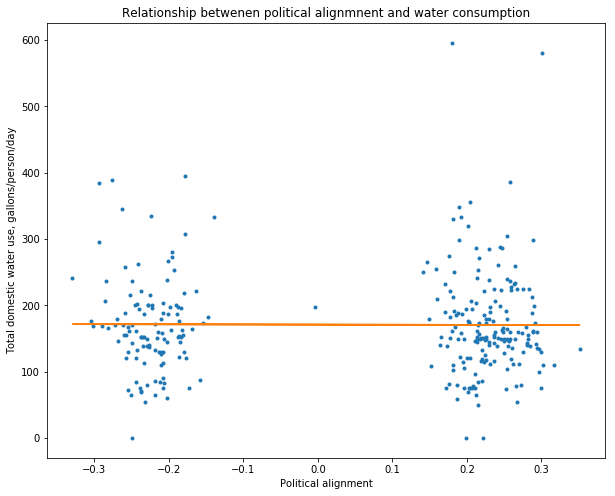

In [9]:
m, b = np.polyfit(water_stats_data['Alignment'], water_stats_data['Total domestic water use per capita, gallons/person/day'], 1)

plt.plot(water_stats_data['Alignment'], water_stats_data['Total domestic water use per capita, gallons/person/day'], '.')
plt.plot(water_stats_data['Alignment'], m*water_stats_data['Alignment'] + b, '-')
plt.xlabel('Political alignment')
plt.ylabel('Total domestic water use, gallons/person/day')
plt.title('Relationship betwenen political alignmnent and water consumption')

In [10]:
water_cor = stats.pearsonr(water_stats_data['Alignment'], water_stats_data['Total domestic water use per capita, gallons/person/day'])
print("p-value:\t", water_cor[1])
print("cor:\t\t", water_cor[0])

p-value:	 0.942067571541
cor:		 -0.00422749210416


In order to analyse the difference between the binary categories of democrat and republican, the dataframe is split so that there is a seprarate dataframe for states whose populations voted mainly democrat and states whose populations voted mainly republican. This was done by creating a value list for 'D' representing democrats, and specifiying a new dataframe that only included values if 'D' was in that row. The republican dataframe was created by specifying a new dataframe for rows that did not have 'D' contained within them.  

In [11]:
water_stats_data2 = water_stats_data[['Outcome', 'Total domestic water use per capita, gallons/person/day', 'Year', 'Alignment']].copy()

value_list = ['D']

water_stats_data_dem = water_stats_data2[water_stats_data2.Outcome.isin(value_list)]
water_stats_data_dem



,Outcome,"Total domestic water use per capita, gallons/person/day",Year,Alignment
35,D,156.0,2005.0,-0.259648
40,D,147.0,2010.0,-0.268438
82,D,169.0,2005.0,-0.289539
87,D,166.0,2010.0,-0.281969
129,D,280.0,2005.0,-0.195367
134,D,273.0,2010.0,-0.195866
166,D,158.0,1995.0,-0.209365
176,D,188.0,2005.0,-0.208350
181,D,196.0,2010.0,-0.221953
213,D,197.0,1995.0,-0.003914


In [12]:
water_stats_data_rep = water_stats_data2[~water_stats_data2.Outcome.isin(value_list)]
water_stats_data_rep

,Outcome,"Total domestic water use per capita, gallons/person/day",Year,Alignment
20,R,175.0,1990.0,0.202686
25,R,187.0,1995.0,0.193616
30,R,75.0,2000.0,0.211396
67,R,119.0,1990.0,0.220027
72,R,138.0,1995.0,0.173253
77,R,54.0,2000.0,0.266573
109,R,0.0,1985.0,0.222167
114,R,0.0,1990.0,0.198728
119,R,265.0,1995.0,0.146099
124,R,109.0,2000.0,0.151466


The Mann-Whitney U test and its p-value and the t-test and its p-value can now be calculated. The distribution of water consumption across different democrat and republican states is then plotted separately, and each distribution has its associated mena, median and standard deviation printed as an output. 

In [13]:
rep_w = water_stats_data_rep['Total domestic water use per capita, gallons/person/day']
dem_w = water_stats_data_dem['Total domestic water use per capita, gallons/person/day']

stats.mannwhitneyu(rep_w, dem_w, use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=10246.0, pvalue=0.31887289067420449)

In [14]:
stats.ttest_ind(rep_w, dem_w, axis=0, equal_var=True)

Ttest_indResult(statistic=0.064513860691976441, pvalue=0.94860461771108029)

71.02734834978821
170.6239316239316
163.0


Text(0.5,1,'Water consumption for democrats across all years')

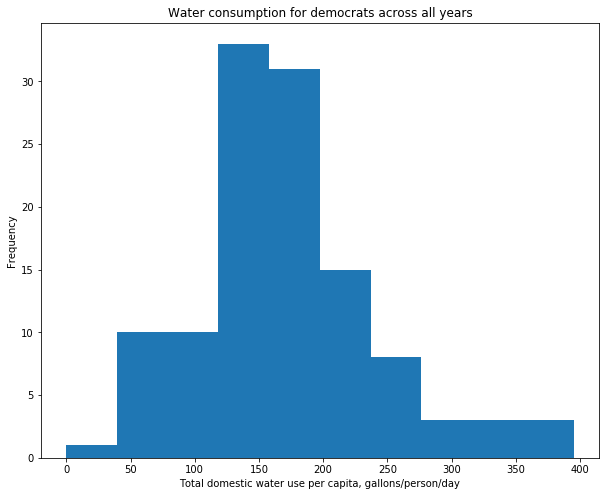

In [15]:
#Distribution of democrat water consumption for all years 

water_dem_sdev = np.std(water_stats_data_dem['Total domestic water use per capita, gallons/person/day'], axis=None, dtype=None, out=None, ddof=0)
water_dem_mean = np.mean(water_stats_data_dem['Total domestic water use per capita, gallons/person/day'], axis=None, dtype=None, out=None)
water_dem_median = np.median(water_stats_data_dem['Total domestic water use per capita, gallons/person/day'], axis=None, out=None)
print (water_dem_sdev)
print (water_dem_mean)
print (water_dem_median)

plt.hist(water_stats_data_dem['Total domestic water use per capita, gallons/person/day'])
plt.xlabel('Total domestic water use per capita, gallons/person/day')
plt.ylabel('Frequency')
plt.title('Water consumption for democrats across all years')

79.5478945378903
171.20994475138122
155.0


Text(0.5,1,'Water consumption for republicans across all years')

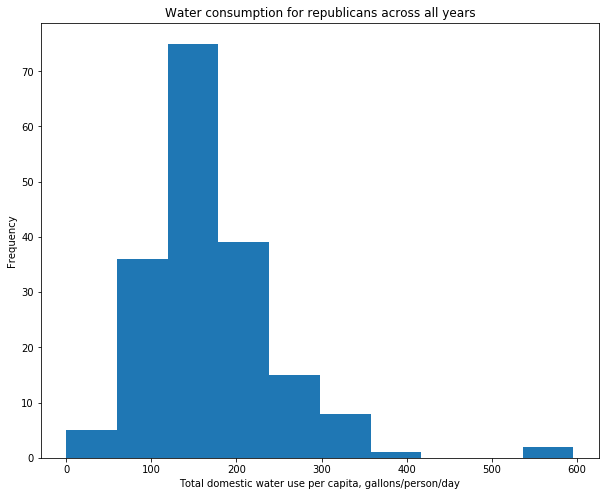

In [16]:

water_rep_sdev = np.std(water_stats_data_rep['Total domestic water use per capita, gallons/person/day'], axis=None, dtype=None, out=None, ddof=0)
water_rep_mean = np.mean(water_stats_data_rep['Total domestic water use per capita, gallons/person/day'], axis=None, dtype=None, out=None)
water_rep_median = np.median(water_stats_data_rep['Total domestic water use per capita, gallons/person/day'], axis=None, out=None)
print (water_rep_sdev)
print (water_rep_mean)
print (water_rep_median)


plt.hist(water_stats_data_rep['Total domestic water use per capita, gallons/person/day'])
plt.xlabel('Total domestic water use per capita, gallons/person/day')
plt.ylabel('Frequency')
plt.title('Water consumption for republicans across all years')

p-value:	 0.185846230709
cor:		 0.123164513796


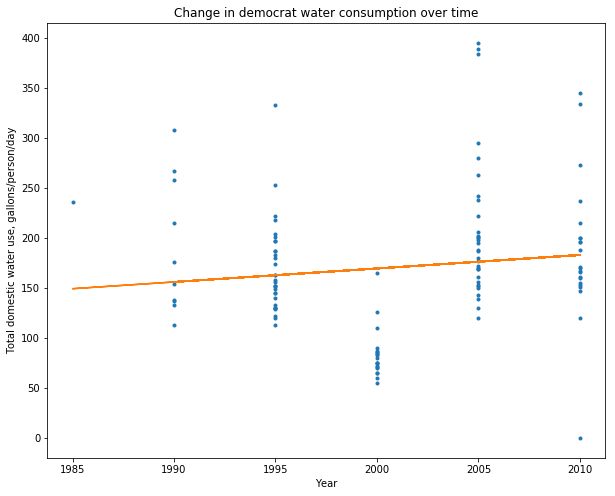

In [18]:
# democrat water consumption over time- to see if there's a significant change over time

m, b = np.polyfit(water_stats_data_dem['Year'], water_stats_data_dem['Total domestic water use per capita, gallons/person/day'], 1)

plt.plot(water_stats_data_dem['Year'], water_stats_data_dem['Total domestic water use per capita, gallons/person/day'], '.')
plt.plot(water_stats_data_dem['Year'], m*water_stats_data_dem['Year'] + b, '-')
plt.xlabel('Year')
plt.ylabel('Total domestic water use, gallons/person/day')
plt.title('Change in democrat water consumption over time')

water_year_dem_cor = stats.pearsonr(water_stats_data_dem['Year'], water_stats_data_dem['Total domestic water use per capita, gallons/person/day'])
print("p-value:\t", water_year_dem_cor[1])
print("cor:\t\t", water_year_dem_cor[0])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


p-value:	 0.00565245544571
cor:		 -0.204923235326


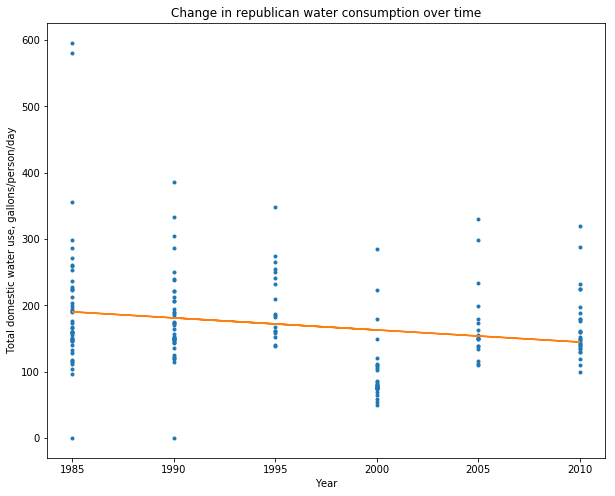

In [19]:
# republican water consumption over time- signifcant decrease over time
water_stats_data_rep['Year'] = water_stats_data_rep['Year'].astype(float)

m, b = np.polyfit(water_stats_data_rep['Year'], water_stats_data_rep['Total domestic water use per capita, gallons/person/day'], 1)

plt.plot(water_stats_data_rep['Year'], water_stats_data_rep['Total domestic water use per capita, gallons/person/day'], '.')
plt.plot(water_stats_data_rep['Year'], m*water_stats_data_rep['Year'] + b, '-')
plt.xlabel('Year')
plt.ylabel('Total domestic water use, gallons/person/day')
plt.title('Change in republican water consumption over time')

water_year_rep_cor = stats.pearsonr(water_stats_data_rep['Year'], water_stats_data_rep['Total domestic water use per capita, gallons/person/day'])
print("p-value:\t", water_year_rep_cor[1])
print("cor:\t\t", water_year_rep_cor[0])

### Carbon dioxide emissions and voting behaviour

The same steps were then applied for the co2 emission data. 

In [21]:
#co2 data and get rid of any NaN values so stats tests and plots can be done 
co2_stats_data = us_state_pop[['Alignment', 'Outcome', 'Residential co2 emissions, metric tons/person', 'Year']].copy()
co2_stats_data['Year'] = co2_stats_data['Year'].astype(float)
co2_stats_data = co2_stats_data.dropna(how='any')
co2_stats_data

,Alignment,Outcome,"Residential co2 emissions, metric tons/person",Year
10,0.168005,R,0.924526,1980.0
11,0.168005,R,0.867672,1981.0
12,0.168005,R,0.866183,1982.0
13,0.168005,R,0.889657,1983.0
14,0.220873,R,0.835058,1984.0
15,0.220873,R,0.730015,1985.0
16,0.220873,R,0.751584,1986.0
17,0.220873,R,0.846769,1987.0
18,0.202686,R,0.844963,1988.0
19,0.202686,R,0.818813,1989.0


Text(0.5,1,'Relationship between alignment and co2 emissions')

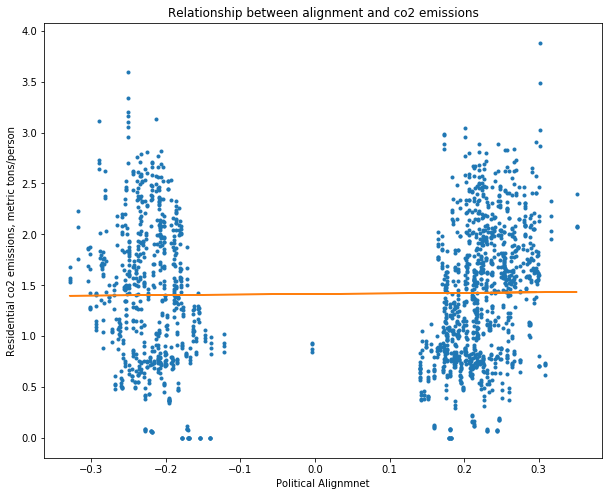

In [22]:
#Alignment vs co2 output over all years

m, b = np.polyfit(co2_stats_data['Alignment'], co2_stats_data['Residential co2 emissions, metric tons/person'], 1)

plt.plot(co2_stats_data['Alignment'], co2_stats_data['Residential co2 emissions, metric tons/person'], '.')
plt.plot(co2_stats_data['Alignment'], m*co2_stats_data['Alignment'] + b, '-')
plt.xlabel('Political Alignmnet')
plt.ylabel('Residential co2 emissions, metric tons/person')
plt.title('Relationship between alignment and co2 emissions')

In [24]:
# pearson product correlation coefficient confirms that there's a weak, statistically insignificant postitive correlation
co2_cor = stats.pearsonr(co2_stats_data['Alignment'], co2_stats_data['Residential co2 emissions, metric tons/person'])
print("p-value:\t", co2_cor[1])
print("cor:\t\t", co2_cor[0])

p-value:	 0.469363365025
cor:		 0.0173063939937


In [26]:
# split co2 data for democrat and republican 

co2_stats_data2 = co2_stats_data[['Outcome', 'Residential co2 emissions, metric tons/person', 'Year']].copy()

value_list = ['D']

co2_stats_data_dem = co2_stats_data2[co2_stats_data2.Outcome.isin(value_list)]
co2_stats_data_dem


,Outcome,"Residential co2 emissions, metric tons/person",Year
34,D,0.662145,2004.0
35,D,0.590835,2005.0
36,D,0.540076,2006.0
37,D,0.513606,2007.0
38,D,0.529862,2008.0
39,D,0.525438,2009.0
40,D,0.605998,2010.0
41,D,0.479175,2011.0
81,D,2.730226,2004.0
82,D,2.698869,2005.0


In [27]:
co2_stats_data_rep = co2_stats_data2[~co2_stats_data2.Outcome.isin(value_list)]
co2_stats_data_rep

,Outcome,"Residential co2 emissions, metric tons/person",Year
10,R,0.924526,1980.0
11,R,0.867672,1981.0
12,R,0.866183,1982.0
13,R,0.889657,1983.0
14,R,0.835058,1984.0
15,R,0.730015,1985.0
16,R,0.751584,1986.0
17,R,0.846769,1987.0
18,R,0.844963,1988.0
19,R,0.818813,1989.0


In [28]:
#Mann Whitney U test shows no statistically significant difference between democrats and republicans at P<0.05, accept null hypothesis
rep_co2 = co2_stats_data_rep['Residential co2 emissions, metric tons/person']
dem_co2 = co2_stats_data_dem['Residential co2 emissions, metric tons/person']

stats.mannwhitneyu(rep_co2, dem_co2, use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=363388.0, pvalue=0.41147557364983123)

In [29]:
# T-test shows that democrats have a lower average co2 output but it's not statistically significant at p<0.05, so accept null hypothesis
stats.ttest_ind(rep_co2, dem_co2, axis=0, equal_var=True)

Ttest_indResult(statistic=-0.24156523599971649, pvalue=0.80914539551988229)

0.7079751962801136
1.4224810465246238
1.41992308253


Text(0.5,1,'Co2 emissions for democrats across all years')

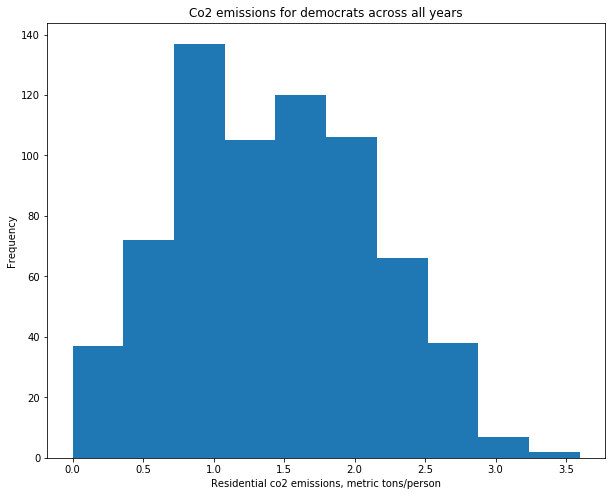

In [30]:
co2_dem_sdev = np.std(dem_co2, axis=None, dtype=None, out=None, ddof=0)
co2_dem_mean = np.mean(dem_co2, axis=None, dtype=None, out=None)
co2_dem_median = np.median(dem_co2, axis=None, out=None)
print (co2_dem_sdev)
print (co2_dem_mean)
print (co2_dem_median)

plt.hist(dem_co2)
plt.xlabel('Residential co2 emissions, metric tons/person')
plt.ylabel('Frequency')
plt.title('Co2 emissions for democrats across all years')

0.6635330440307988
1.4144248917738567
1.45962112529


Text(0.5,1,'Co2 emissions for republicans across all years')

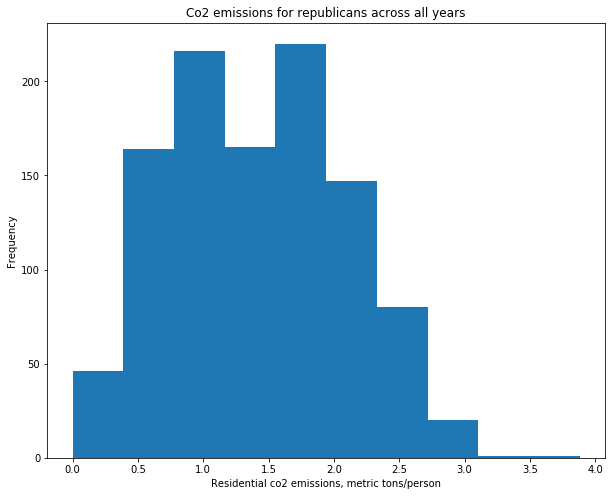

In [31]:
# data appears mostly normally distributed therefore t-test result should be used

co2_rep_sdev = np.std(rep_co2, axis=None, dtype=None, out=None, ddof=0)
co2_rep_mean = np.mean(rep_co2, axis=None, dtype=None, out=None)
co2_rep_median = np.median(rep_co2, axis=None, out=None)
print (co2_rep_sdev)
print (co2_rep_mean)
print (co2_rep_median)


plt.hist(rep_co2)
plt.xlabel('Residential co2 emissions, metric tons/person')
plt.ylabel('Frequency')
plt.title('Co2 emissions for republicans across all years')

Text(0.5,1,'Change in republican co2 emissions over time')

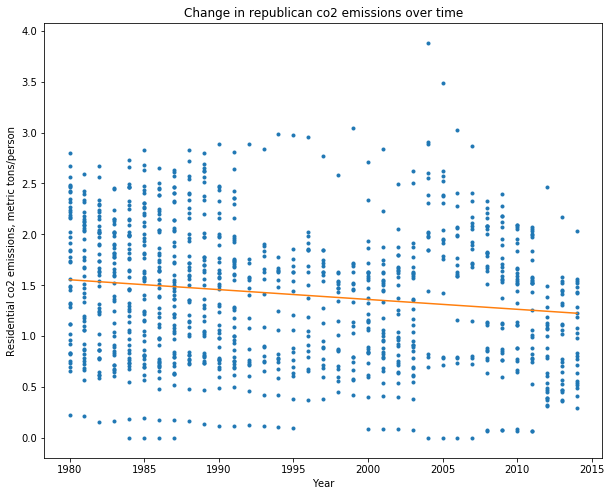

In [32]:
m, b = np.polyfit(co2_stats_data_rep['Year'], co2_stats_data_rep['Residential co2 emissions, metric tons/person'], 1)

plt.plot(co2_stats_data_rep['Year'], co2_stats_data_rep['Residential co2 emissions, metric tons/person'], '.')
plt.plot(co2_stats_data_rep['Year'], m*co2_stats_data_rep['Year'] + b, '-')
plt.xlabel('Year')
plt.ylabel('Residential co2 emissions, metric tons/person')
plt.title('Change in republican co2 emissions over time')

In [33]:
# change over time of co2 emissions for republicans is statistically significant but very weak, correlation
co2_rep_year_cor = stats.pearsonr(co2_stats_data_rep['Year'], co2_stats_data_rep['Residential co2 emissions, metric tons/person'])
print("p-value:\t", co2_rep_year_cor[1])
print("cor:\t\t", co2_rep_year_cor[0])

p-value:	 6.07481687304e-07
cor:		 -0.152513200686


p-value:	 3.57348526017e-09
cor:		 -0.222301712341


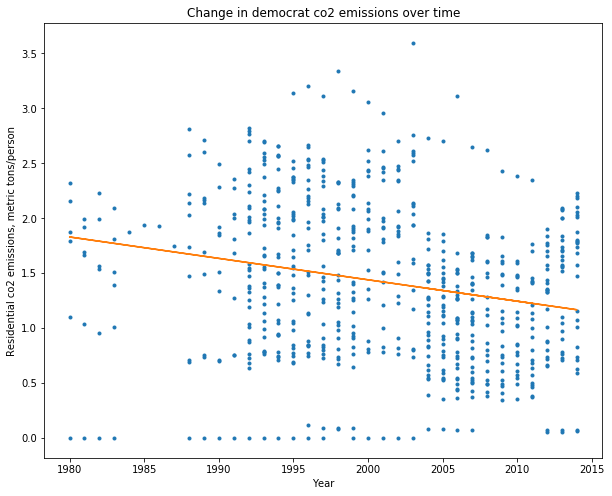

In [34]:
#year did make a difference for democrats either but very little - weak negative but statistically significant
m, b = np.polyfit(co2_stats_data_dem['Year'], co2_stats_data_dem['Residential co2 emissions, metric tons/person'], 1)

plt.plot(co2_stats_data_dem['Year'], co2_stats_data_dem['Residential co2 emissions, metric tons/person'], '.')
plt.plot(co2_stats_data_dem['Year'], m*co2_stats_data_dem['Year'] + b, '-')
plt.xlabel('Year')
plt.ylabel('Residential co2 emissions, metric tons/person')
plt.title('Change in democrat co2 emissions over time')


co2_dem_year_cor = stats.pearsonr(co2_stats_data_dem['Year'], co2_stats_data_dem['Residential co2 emissions, metric tons/person'])
print("p-value:\t", co2_dem_year_cor[1])
print("cor:\t\t", co2_dem_year_cor[0])

### Renewable energy consumption and voting behaviour

Again the same steps were repeated for renewable consumption. 

In [36]:
RETCB_stats_data = us_state_pop[['Alignment', 'Outcome', 'Renewable energy total consumption, billion btu/person', 'Year']].copy()
RETCB_stats_data['Year'] = RETCB_stats_data['Year'].astype(float)
RETCB_stats_data = RETCB_stats_data.dropna(how='any')
RETCB_stats_data

,Alignment,Outcome,"Renewable energy total consumption, billion btu/person",Year
10,0.168005,R,0.061318,1980.0
11,0.168005,R,0.054448,1981.0
12,0.168005,R,0.067651,1982.0
13,0.168005,R,0.071726,1983.0
14,0.220873,R,0.072910,1984.0
15,0.220873,R,0.062588,1985.0
16,0.220873,R,0.054060,1986.0
17,0.220873,R,0.058156,1987.0
18,0.202686,R,0.053828,1988.0
19,0.202686,R,0.075517,1989.0


p-value:	 0.0183621510236
cor:		 0.0525444213618


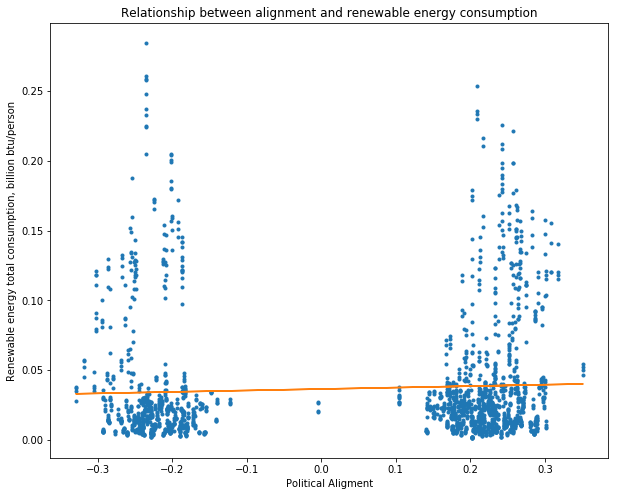

In [37]:
#Alignment vs renewable energy use over all years

m, b = np.polyfit(RETCB_stats_data['Alignment'], RETCB_stats_data['Renewable energy total consumption, billion btu/person'], 1)

plt.plot(RETCB_stats_data['Alignment'], RETCB_stats_data['Renewable energy total consumption, billion btu/person'], '.')
plt.plot(RETCB_stats_data['Alignment'], m*RETCB_stats_data['Alignment'] + b, '-')
plt.xlabel('Political Aligment')
plt.ylabel('Renewable energy total consumption, billion btu/person')
plt.title('Relationship between alignment and renewable energy consumption')

# pearson product correlation coefficient confirms that there's a weak, statistically insignificant postitive correlation
RETCB_cor = stats.pearsonr(RETCB_stats_data['Alignment'], RETCB_stats_data['Renewable energy total consumption, billion btu/person'])
print("p-value:\t", RETCB_cor[1])
print("cor:\t\t", RETCB_cor[0])

In [39]:
# split RETCB data for democrat and republican 

In [40]:
RETCB_stats_data2 = RETCB_stats_data[['Outcome', 'Renewable energy total consumption, billion btu/person', 'Year']].copy()

value_list = ['D']

RETCB_stats_data_dem = RETCB_stats_data2[RETCB_stats_data2.Outcome.isin(value_list)]
RETCB_stats_data_dem

,Outcome,"Renewable energy total consumption, billion btu/person",Year
34,D,0.064717,2004.0
35,D,0.061220,2005.0
36,D,0.057530,2006.0
37,D,0.048928,2007.0
38,D,0.050256,2008.0
39,D,0.057508,2009.0
40,D,0.053121,2010.0
41,D,0.055444,2011.0
81,D,0.028602,2004.0
82,D,0.024978,2005.0


In [41]:
RETCB_stats_data_rep = RETCB_stats_data2[~RETCB_stats_data2.Outcome.isin(value_list)]
RETCB_stats_data_rep

,Outcome,"Renewable energy total consumption, billion btu/person",Year
10,R,0.061318,1980.0
11,R,0.054448,1981.0
12,R,0.067651,1982.0
13,R,0.071726,1983.0
14,R,0.072910,1984.0
15,R,0.062588,1985.0
16,R,0.054060,1986.0
17,R,0.058156,1987.0
18,R,0.053828,1988.0
19,R,0.075517,1989.0


In [42]:
#Mann Whitney U test shows stastically significant difference between renewable energy consumption by democrats and republicans overall- confirms r correlation
rep_RETCB = RETCB_stats_data_rep['Renewable energy total consumption, billion btu/person']
dem_RETCB = RETCB_stats_data_dem['Renewable energy total consumption, billion btu/person']

stats.mannwhitneyu(rep_RETCB, dem_RETCB, use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=430784.0, pvalue=1.5563330007679746e-06)

In [43]:
#shows difference between republicans and democrats but not statistically significant at p<0.05
stats.ttest_ind(rep_RETCB, dem_RETCB, axis=0, equal_var=True)

Ttest_indResult(statistic=1.553888831034214, pvalue=0.12036820957283771)

0.04295279232269219
0.038085266837949584
0.0231976445488


Text(0.5,1,'Republican renewable energy consumption across all years')

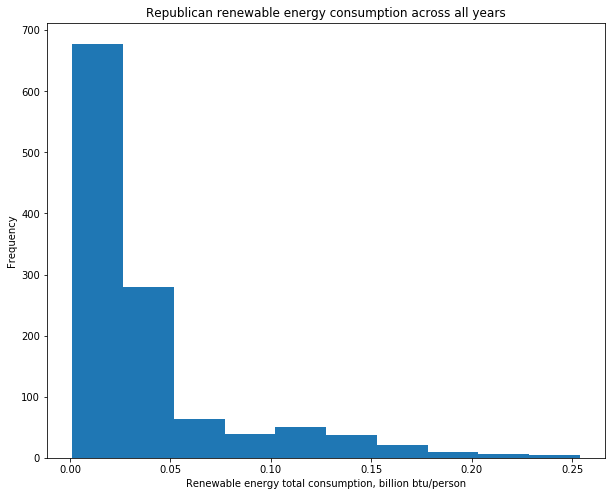

In [44]:
RETCB_rep_sdev = np.std(rep_RETCB, axis=None, dtype=None, out=None, ddof=0)
RETCB_rep_mean = np.mean(rep_RETCB, axis=None, dtype=None, out=None)
RETCB_rep_median = np.median(rep_RETCB, axis=None, out=None)
print (RETCB_rep_sdev)
print (RETCB_rep_mean)
print (RETCB_rep_median)

plt.hist(rep_RETCB)
plt.xlabel('Renewable energy total consumption, billion btu/person')
plt.ylabel('Frequency')
plt.title('Republican renewable energy consumption across all years')

0.04607858405128554
0.0349678626493778
0.0181536708884


Text(0.5,1,'Democrat renewable energy consumption across all years')

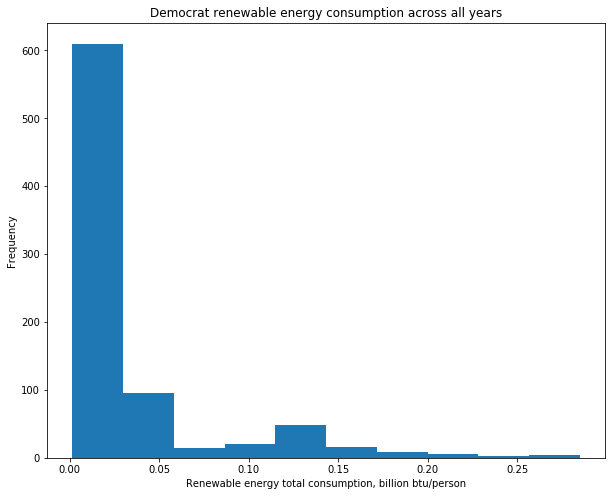

In [45]:
# data not normally distributed therefore Mann-Whitney test result should be used

RETCB_dem_sdev = np.std(dem_RETCB, axis=None, dtype=None, out=None, ddof=0)
RETCB_dem_mean = np.mean(dem_RETCB, axis=None, dtype=None, out=None)
RETCB_dem_median = np.median(dem_RETCB, axis=None, out=None)
print (RETCB_dem_sdev)
print (RETCB_dem_mean)
print (RETCB_dem_median)

plt.hist(dem_RETCB)
plt.xlabel('Renewable energy total consumption, billion btu/person')
plt.ylabel('Frequency')
plt.title('Democrat renewable energy consumption across all years')

p-value:	 0.721388637863
cor:		 0.0103567426961


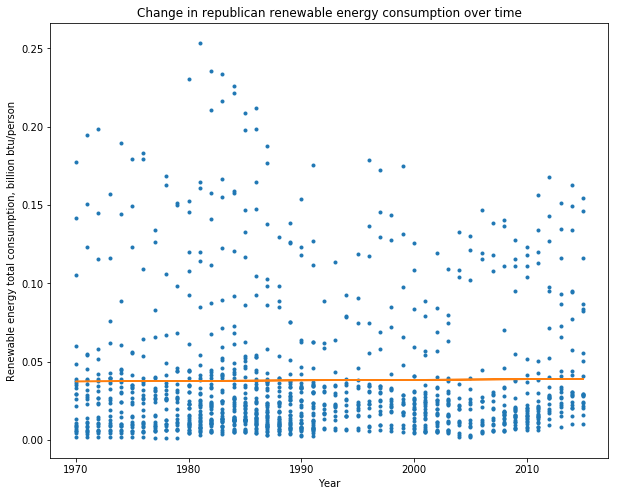

In [46]:
# no statistically significant change in per capita renewable energy consumption for republicans over time
m, b = np.polyfit(RETCB_stats_data_rep['Year'], RETCB_stats_data_rep['Renewable energy total consumption, billion btu/person'], 1)

plt.plot(RETCB_stats_data_rep['Year'], RETCB_stats_data_rep['Renewable energy total consumption, billion btu/person'], '.')
plt.plot(RETCB_stats_data_rep['Year'], m*RETCB_stats_data_rep['Year'] + b, '-')
plt.xlabel('Year')
plt.ylabel('Renewable energy total consumption, billion btu/person')
plt.title('Change in republican renewable energy consumption over time')

RETCB_rep_year_cor = stats.pearsonr(RETCB_stats_data_rep['Year'], RETCB_stats_data_rep['Renewable energy total consumption, billion btu/person'])
print("p-value:\t", RETCB_rep_year_cor[1])
print("cor:\t\t", RETCB_rep_year_cor[0])

p-value:	 0.0805292435711
cor:		 0.0608433952519


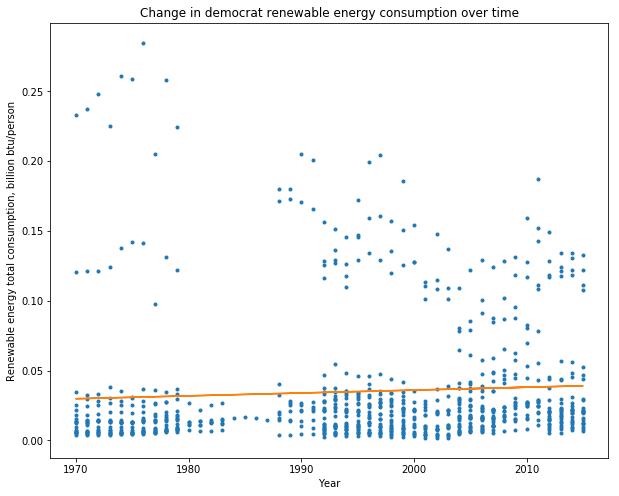

In [47]:
# no statistically significant change in per capita renewable energy consumption for democrats over time


m, b = np.polyfit(RETCB_stats_data_dem['Year'], RETCB_stats_data_dem['Renewable energy total consumption, billion btu/person'], 1)

plt.plot(RETCB_stats_data_dem['Year'], RETCB_stats_data_dem['Renewable energy total consumption, billion btu/person'], '.')
plt.plot(RETCB_stats_data_dem['Year'], m*RETCB_stats_data_dem['Year'] + b, '-')
plt.xlabel('Year')
plt.ylabel('Renewable energy total consumption, billion btu/person')
plt.title('Change in democrat renewable energy consumption over time')

RETCB_dem_year_cor = stats.pearsonr(RETCB_stats_data_dem['Year'], RETCB_stats_data_dem['Renewable energy total consumption, billion btu/person'])
print("p-value:\t", RETCB_dem_year_cor[1])
print("cor:\t\t", RETCB_dem_year_cor[0])

### Total Energy Consumption and Voting Behaviour

Again, the same steps were repeated for the total energy consumption. 

In [49]:
TERPB_stats_data = us_state_pop[['Alignment', 'Outcome', 'Total energy consumption per capita in the residential sector, Million Btu/person', 'Year']].copy()
TERPB_stats_data['Year'] = TERPB_stats_data['Year'].astype(float)
TERPB_stats_data = TERPB_stats_data.dropna(how='any')
TERPB_stats_data

,Alignment,Outcome,"Total energy consumption per capita in the residential sector, Million Btu/person",Year
10,0.168005,R,70.0,1980.0
11,0.168005,R,67.0,1981.0
12,0.168005,R,68.0,1982.0
13,0.168005,R,67.0,1983.0
14,0.220873,R,71.0,1984.0
15,0.220873,R,69.0,1985.0
16,0.220873,R,71.0,1986.0
17,0.220873,R,73.0,1987.0
18,0.202686,R,74.0,1988.0
19,0.202686,R,76.0,1989.0


p-value:	 0.0180225928854
cor:		 0.0526984020909


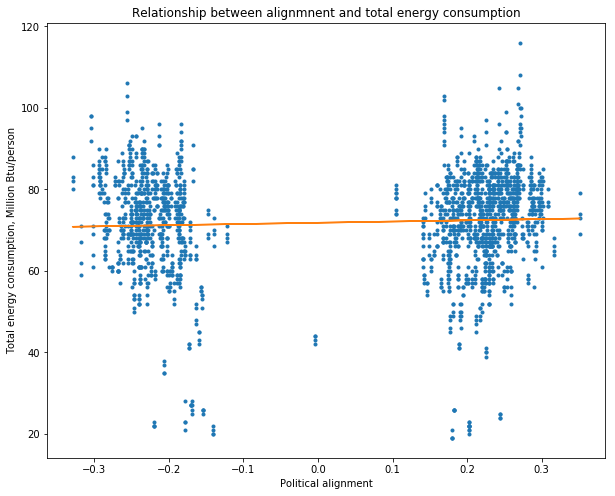

In [50]:
#Alignment vs total energy use over all years

m, b = np.polyfit(TERPB_stats_data['Alignment'], TERPB_stats_data['Total energy consumption per capita in the residential sector, Million Btu/person'], 1)

plt.plot(TERPB_stats_data['Alignment'], TERPB_stats_data['Total energy consumption per capita in the residential sector, Million Btu/person'], '.')
plt.plot(TERPB_stats_data['Alignment'], m*TERPB_stats_data['Alignment'] + b, '-')
plt.xlabel('Political alignment')
plt.ylabel('Total energy consumption, Million Btu/person')
plt.title('Relationship between alignmnent and total energy consumption')

# pearson product correlation coefficient confirms that there's a weak, statistically significant postitive correlation
TERPB_cor = stats.pearsonr(TERPB_stats_data['Alignment'], TERPB_stats_data['Total energy consumption per capita in the residential sector, Million Btu/person'])
print("p-value:\t", TERPB_cor[1])
print("cor:\t\t", TERPB_cor[0])

In [52]:
# split total energy consumption in democrats and republicans

In [53]:
TERPB_stats_data2 = TERPB_stats_data[['Outcome', 'Total energy consumption per capita in the residential sector, Million Btu/person', 'Year']].copy()

value_list = ['D']

TERPB_stats_data_dem = TERPB_stats_data2[TERPB_stats_data2.Outcome.isin(value_list)]
TERPB_stats_data_dem

,Outcome,"Total energy consumption per capita in the residential sector, Million Btu/person",Year
34,D,84.0,2004.0
35,D,84.0,2005.0
36,D,85.0,2006.0
37,D,84.0,2007.0
38,D,82.0,2008.0
39,D,78.0,2009.0
40,D,87.0,2010.0
41,D,78.0,2011.0
81,D,85.0,2004.0
82,D,80.0,2005.0


In [54]:
TERPB_stats_data_rep = TERPB_stats_data2[~TERPB_stats_data2.Outcome.isin(value_list)]
TERPB_stats_data_rep

,Outcome,"Total energy consumption per capita in the residential sector, Million Btu/person",Year
10,R,70.0,1980.0
11,R,67.0,1981.0
12,R,68.0,1982.0
13,R,67.0,1983.0
14,R,71.0,1984.0
15,R,69.0,1985.0
16,R,71.0,1986.0
17,R,73.0,1987.0
18,R,74.0,1988.0
19,R,76.0,1989.0


In [55]:
#Mann Whitney U test shows stastically significant difference between total energy consumption by democrats and republicans overall- confirms r correlation
rep_TERPB = TERPB_stats_data_rep['Total energy consumption per capita in the residential sector, Million Btu/person']
dem_TERPB = TERPB_stats_data_dem['Total energy consumption per capita in the residential sector, Million Btu/person']

stats.mannwhitneyu(rep_TERPB, dem_TERPB, use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=456447.5, pvalue=0.0038466099816471095)

In [56]:
#T-test confirms Mann Whitney U test, republicans comsume more energy than democrats
stats.ttest_ind(rep_TERPB, dem_TERPB, axis=0, equal_var=True)

Ttest_indResult(statistic=2.6676638566100297, pvalue=0.0076993261191520791)

12.216026014689103
72.57239057239057
75.0


Text(0.5,1,'Republican total energy consumption across all years')

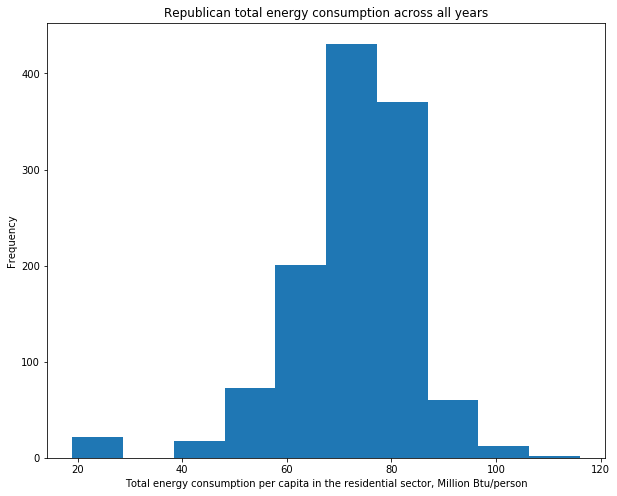

In [57]:
# data not normally distributed therefore Mann-Whitney U test should be used

TERPB_rep_sdev = np.std(rep_TERPB, axis=None, dtype=None, out=None, ddof=0)
TERPB_rep_mean = np.mean(rep_TERPB, axis=None, dtype=None, out=None)
TERPB_rep_median = np.median(rep_TERPB, axis=None, out=None)
print (TERPB_rep_sdev)
print (TERPB_rep_mean)
print (TERPB_rep_median)

plt.hist(rep_TERPB)
plt.xlabel('Total energy consumption per capita in the residential sector, Million Btu/person')
plt.ylabel('Frequency')
plt.title('Republican total energy consumption across all years')

13.327716949751139
71.03874092009686
72.5


Text(0.5,1,'Democrat total energy consumption across all years')

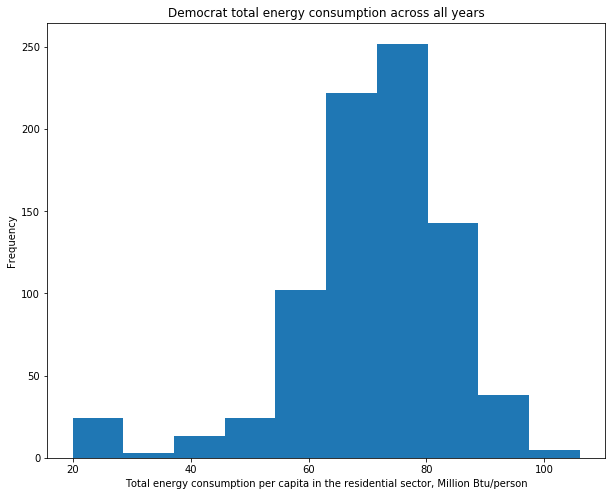

In [58]:
TERPB_dem_sdev = np.std(dem_TERPB, axis=None, dtype=None, out=None, ddof=0)
TERPB_dem_mean = np.mean(dem_TERPB, axis=None, dtype=None, out=None)
TERPB_dem_median = np.median(dem_TERPB, axis=None, out=None)
print (TERPB_dem_sdev)
print (TERPB_dem_mean)
print (TERPB_dem_median)

plt.hist(dem_TERPB)
plt.xlabel('Total energy consumption per capita in the residential sector, Million Btu/person')
plt.ylabel('Frequency')
plt.title('Democrat total energy consumption across all years')

p-value:	 0.402700005548
cor:		 0.0243002839233


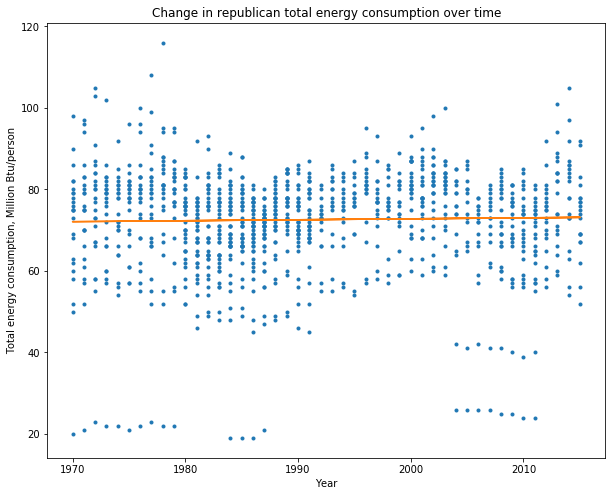

In [59]:
#no per capita change in total energy consumption for republicans
m, b = np.polyfit(TERPB_stats_data_rep['Year'], TERPB_stats_data_rep['Total energy consumption per capita in the residential sector, Million Btu/person'], 1)

plt.plot(TERPB_stats_data_rep['Year'], TERPB_stats_data_rep['Total energy consumption per capita in the residential sector, Million Btu/person'], '.')
plt.plot(TERPB_stats_data_rep['Year'], m*TERPB_stats_data_rep['Year'] + b, '-')
plt.xlabel('Year')
plt.ylabel('Total energy consumption, Million Btu/person')
plt.title('Change in republican total energy consumption over time')

TERPB_rep_year_cor = stats.pearsonr(TERPB_stats_data_rep['Year'], TERPB_stats_data_rep['Total energy consumption per capita in the residential sector, Million Btu/person'])
print("p-value:\t", TERPB_rep_year_cor[1])
print("cor:\t\t", TERPB_rep_year_cor[0])

p-value:	 0.00044438976548
cor:		 0.12193394666


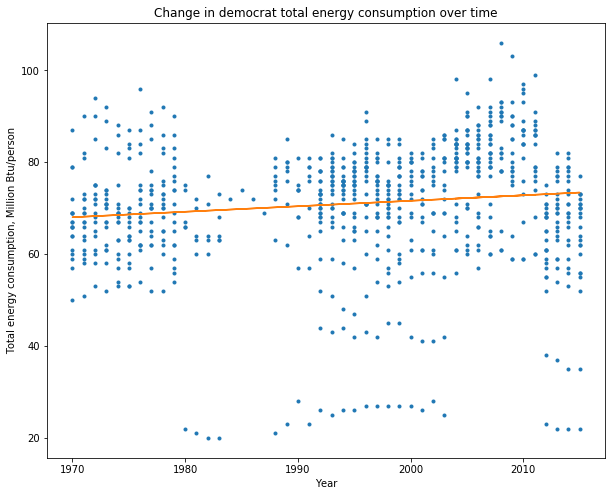

In [60]:
#slight increase in total energy consumption over time for democrats

m, b = np.polyfit(TERPB_stats_data_dem['Year'], TERPB_stats_data_dem['Total energy consumption per capita in the residential sector, Million Btu/person'], 1)

plt.plot(TERPB_stats_data_dem['Year'], TERPB_stats_data_dem['Total energy consumption per capita in the residential sector, Million Btu/person'], '.')
plt.plot(TERPB_stats_data_dem['Year'], m*TERPB_stats_data_dem['Year'] + b, '-')
plt.xlabel('Year')
plt.ylabel('Total energy consumption, Million Btu/person')
plt.title('Change in democrat total energy consumption over time')

TERPB_dem_year_cor = stats.pearsonr(TERPB_stats_data_dem['Year'], TERPB_stats_data_dem['Total energy consumption per capita in the residential sector, Million Btu/person'])
print("p-value:\t", TERPB_dem_year_cor[1])
print("cor:\t\t", TERPB_dem_year_cor[0])

### All Petroleum Product Consumption and Voting Behaviour

Again, the same steps were repeated for the total consumption of petroleum products. 

In [61]:
PARCP_stats_data = us_state_pop[['Alignment', 'Outcome', 'All petroleum products consumed by the residential sector, thousand barrels/person', 'Year']].copy()
PARCP_stats_data['Year'] = PARCP_stats_data['Year'].astype(float)
PARCP_stats_data = PARCP_stats_data.dropna(how='any')
PARCP_stats_data

,Alignment,Outcome,"All petroleum products consumed by the residential sector, thousand barrels/person",Year
10,0.168005,R,0.000620,1980.0
11,0.168005,R,0.000634,1981.0
12,0.168005,R,0.000647,1982.0
13,0.168005,R,0.000754,1983.0
14,0.220873,R,0.000463,1984.0
15,0.220873,R,0.000471,1985.0
16,0.220873,R,0.000532,1986.0
17,0.220873,R,0.000620,1987.0
18,0.202686,R,0.000625,1988.0
19,0.202686,R,0.000667,1989.0


p-value:	 0.137089893946
cor:		 -0.0331397040447


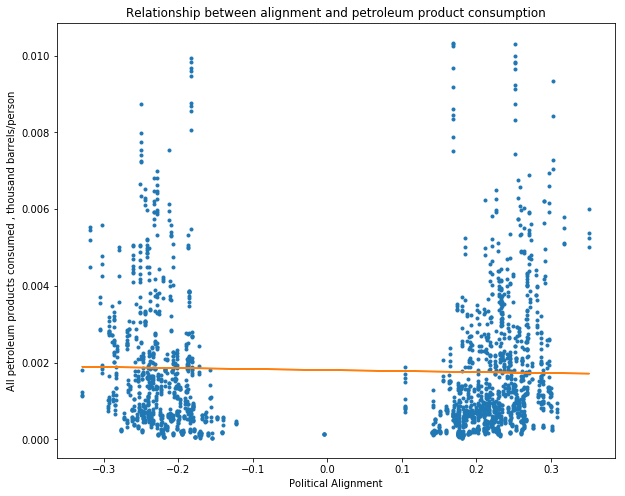

In [62]:
#Alignment vs all petroleum products consumption over all years

m, b = np.polyfit(PARCP_stats_data['Alignment'], PARCP_stats_data['All petroleum products consumed by the residential sector, thousand barrels/person'], 1)

plt.plot(PARCP_stats_data['Alignment'], PARCP_stats_data['All petroleum products consumed by the residential sector, thousand barrels/person'], '.')
plt.plot(PARCP_stats_data['Alignment'], m*PARCP_stats_data['Alignment'] + b, '-')
plt.xlabel('Political Alignment')
plt.ylabel('All petroleum products consumed , thousand barrels/person')
plt.title('Relationship between alignment and petroleum product consumption')

# pearson product correlation coefficient confirms that there's a weak, statistically insignificant correlation
PARCP_cor = stats.pearsonr(PARCP_stats_data['Alignment'], PARCP_stats_data['All petroleum products consumed by the residential sector, thousand barrels/person'])
print("p-value:\t", PARCP_cor[1])
print("cor:\t\t", PARCP_cor[0])

In [63]:
PARCP_stats_data2 = PARCP_stats_data[['Outcome', 'All petroleum products consumed by the residential sector, thousand barrels/person', 'Year']].copy()

value_list = ['D']

PARCP_stats_data_dem = PARCP_stats_data2[PARCP_stats_data2.Outcome.isin(value_list)]
PARCP_stats_data_dem

,Outcome,"All petroleum products consumed by the residential sector, thousand barrels/person",Year
34,D,0.000539,2004.0
35,D,0.000373,2005.0
36,D,0.000372,2006.0
37,D,0.000390,2007.0
38,D,0.000421,2008.0
39,D,0.000450,2009.0
40,D,0.000492,2010.0
41,D,0.000320,2011.0
81,D,0.002726,2004.0
82,D,0.002711,2005.0


In [64]:
PARCP_stats_data_rep = PARCP_stats_data2[~PARCP_stats_data2.Outcome.isin(value_list)]
PARCP_stats_data_rep

,Outcome,"All petroleum products consumed by the residential sector, thousand barrels/person",Year
10,R,0.000620,1980.0
11,R,0.000634,1981.0
12,R,0.000647,1982.0
13,R,0.000754,1983.0
14,R,0.000463,1984.0
15,R,0.000471,1985.0
16,R,0.000532,1986.0
17,R,0.000620,1987.0
18,R,0.000625,1988.0
19,R,0.000667,1989.0


In [65]:
#Mann Whitney U test shows stastically significant difference between petroleum consumption by democrats and republicans overall- higher for democrats
rep_PARCP = PARCP_stats_data_rep['All petroleum products consumed by the residential sector, thousand barrels/person']
dem_PARCP = PARCP_stats_data_dem['All petroleum products consumed by the residential sector, thousand barrels/person']

stats.mannwhitneyu(rep_PARCP, dem_PARCP, use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=458289.0, pvalue=0.0058591370437190765)

In [66]:
#T-test shows no statistically significant difference between democrat and republican petroleum consumption
stats.ttest_ind(rep_PARCP, dem_PARCP, axis=0, equal_var=True)

Ttest_indResult(statistic=-2.1516051677887154, pvalue=0.031547153211141495)

0.001760246859115851
0.001722576885705678
0.00108978478637


Text(0.5,1,'Republican total petroleum product consumption across all years')

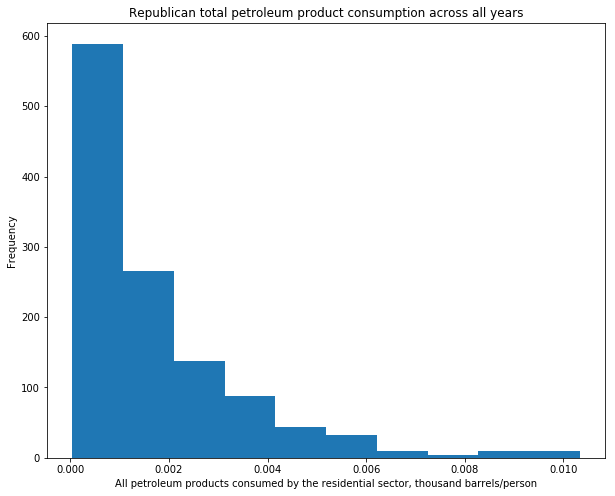

In [67]:
PARCP_rep_sdev = np.std(rep_PARCP, axis=None, dtype=None, out=None, ddof=0)
PARCP_rep_mean = np.mean(rep_PARCP, axis=None, dtype=None, out=None)
PARCP_rep_median = np.median(rep_PARCP, axis=None, out=None)
print (PARCP_rep_sdev)
print (PARCP_rep_mean)
print (PARCP_rep_median)

plt.hist(rep_PARCP)
plt.xlabel('All petroleum products consumed by the residential sector, thousand barrels/person')
plt.ylabel('Frequency')
plt.title('Republican total petroleum product consumption across all years')

0.0018017780569953548
0.0018959151140490907
0.00137394973912


Text(0.5,1,'Democrat total petroleum product consumption across all years')

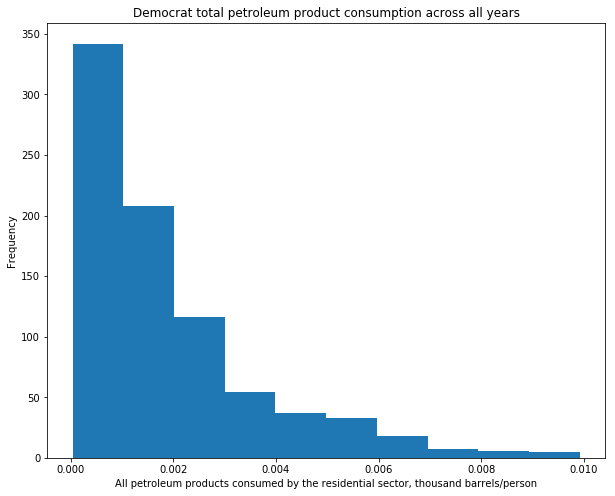

In [68]:
# data not normally distributed therefore Mann-Whitney U test resut should be used

PARCP_dem_sdev = np.std(dem_PARCP, axis=None, dtype=None, out=None, ddof=0)
PARCP_dem_mean = np.mean(dem_PARCP, axis=None, dtype=None, out=None)
PARCP_dem_median = np.median(dem_PARCP, axis=None, out=None)
print (PARCP_dem_sdev)
print (PARCP_dem_mean)
print (PARCP_dem_median)

plt.hist(dem_PARCP)
plt.xlabel('All petroleum products consumed by the residential sector, thousand barrels/person')
plt.ylabel('Frequency')
plt.title('Democrat total petroleum product consumption across all years')

p-value:	 1.43308025751e-15
cor:		 -0.228761114626


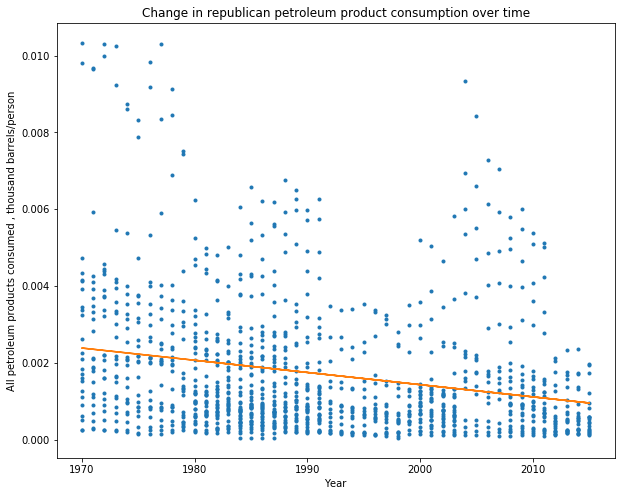

In [69]:
#decline in per capita petroleum consumption over time for republicans
m, b = np.polyfit(PARCP_stats_data_rep['Year'], PARCP_stats_data_rep['All petroleum products consumed by the residential sector, thousand barrels/person'], 1)

plt.plot(PARCP_stats_data_rep['Year'], PARCP_stats_data_rep['All petroleum products consumed by the residential sector, thousand barrels/person'], '.')
plt.plot(PARCP_stats_data_rep['Year'], m*PARCP_stats_data_rep['Year'] + b, '-')
plt.xlabel('Year')
plt.ylabel('All petroleum products consumed , thousand barrels/person')
plt.title('Change in republican petroleum product consumption over time')

PARCP_rep_year_cor = stats.pearsonr(PARCP_stats_data_rep['Year'], PARCP_stats_data_rep['All petroleum products consumed by the residential sector, thousand barrels/person'])
print("p-value:\t", PARCP_rep_year_cor[1])
print("cor:\t\t", PARCP_rep_year_cor[0])

p-value:	 1.03974150676e-26
cor:		 -0.360209940828


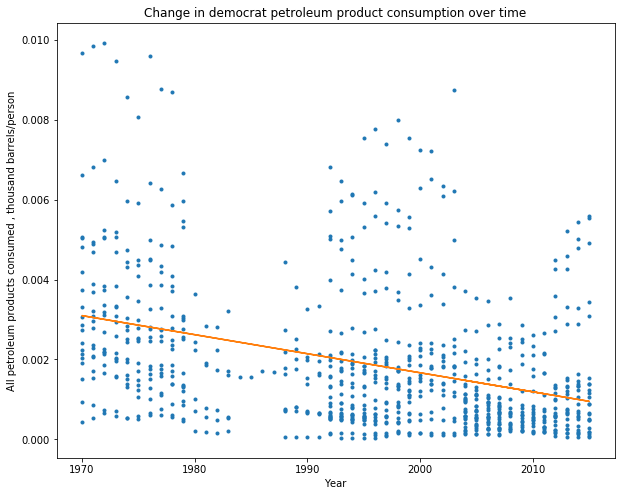

In [70]:
# also decline in per capita petroleum consumption over time for democrats but stronger decline than for republicans

m, b = np.polyfit(PARCP_stats_data_dem['Year'], PARCP_stats_data_dem['All petroleum products consumed by the residential sector, thousand barrels/person'], 1)

plt.plot(PARCP_stats_data_dem['Year'], PARCP_stats_data_dem['All petroleum products consumed by the residential sector, thousand barrels/person'], '.')
plt.plot(PARCP_stats_data_dem['Year'], m*PARCP_stats_data_dem['Year'] + b, '-')
plt.xlabel('Year')
plt.ylabel('All petroleum products consumed , thousand barrels/person')
plt.title('Change in democrat petroleum product consumption over time')


PARCP_dem_year_cor = stats.pearsonr(PARCP_stats_data_dem['Year'], PARCP_stats_data_dem['All petroleum products consumed by the residential sector, thousand barrels/person'])
print("p-value:\t", PARCP_dem_year_cor[1])
print("cor:\t\t", PARCP_dem_year_cor[0])